# Consulta dos dados de Vacinação Covid-19
### Exemplo de Webscraping com Python

Prática de como coletar dados por Webscraping, tratá-los e analisá-los.

Amostra contendo 10000 observações com os dados de vacinação de todo país, coletados do [openDataSus](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao) através de API.

In [178]:
import pandas as pd
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
from matplotlib import cm

from requests.auth import HTTPBasicAuth

In [2]:
url = 'https://imunizacao-es.saude.gov.br/_search?scroll=1m'

payload = {
  "size": 10000
}

r = requests.post(url, 
                  auth=HTTPBasicAuth('imunizacao_public', 'qlto5t&7r_@+#Tlstigi'),
                  params=payload)

r

<Response [200]>

Com auxilio da documentação da API, coletei os dados via post, passando o parâmetro _"size"_ para definir o tamanho da amostra dos dados. Sem esse parâmetro, a API retorna apenas 10 observações. O retorno _200_ indica que a requisição foi bem sucedida.

In [3]:
vacinacao = r.json()
df = pd.json_normalize(vacinacao['hits']['hits'])
df.head()

,_index,_type,_id,_score,_source.vacina_categoria_codigo,_source.estalecimento_noFantasia,_source.paciente_endereco_coPais,_source.vacina_lote,_source.document_id,_source.paciente_endereco_nmPais,...,_source.paciente_racaCor_codigo,_source.paciente_enumSexoBiologico,_source.data_importacao_rnds,_source.@version,_source.dt_deleted,_source.estabelecimento_municipio_codigo,_source.paciente_id,_source.estabelecimento_municipio_nome,_source.paciente_endereco_cep,_source.vacina_categoria_nome
0,desc-imunizacao-v3,_doc,3c4d7bac-84bb-41c0-9e73-b6bbe45232b5-i0b0,1.0,3,UNIDADE MICRO REGIONAL DE REFERENCIA CMEC,10,210014,3c4d7bac-84bb-41c0-9e73-b6bbe45232b5-i0b0,BRASIL,...,01,F,2021-02-16T16:03:28.000Z,1,None,310150,587d5c56a89b8fdd9c419fcd303c38836dcfe3ba9d665b...,ALEM PARAIBA,36660,Pessoas de 60 anos ou mais institucionalizadas
1,desc-imunizacao-v3,_doc,7ca1ddcc-b536-488b-ab20-c14d5607a858-i0b0,1.0,3,UNIDADE MICRO REGIONAL DE REFERENCIA CMEC,10,210014,7ca1ddcc-b536-488b-ab20-c14d5607a858-i0b0,BRASIL,...,01,F,2021-02-16T15:27:03.000Z,1,None,310150,49d68e94312c811991ec68020fc006ce285ac6b24103ef...,ALEM PARAIBA,36660,Pessoas de 60 anos ou mais institucionalizadas
2,desc-imunizacao-v3,_doc,a4d13c11-cc8c-4829-9c06-1b79f0b69902-i0b0,1.0,3,UNIDADE MICRO REGIONAL DE REFERENCIA CMEC,10,210014,a4d13c11-cc8c-4829-9c06-1b79f0b69902-i0b0,BRASIL,...,01,F,2021-02-16T15:07:36.000Z,1,None,310150,f64a1d36894c3b807059994a14053d748e92baebd315c3...,ALEM PARAIBA,36660,Pessoas de 60 anos ou mais institucionalizadas
3,desc-imunizacao-v3,_doc,8fd27eeb-db73-4084-8b0c-e93c4d723647-i0b0,1.0,3,UNIDADE MICRO REGIONAL DE REFERENCIA CMEC,10,210014,8fd27eeb-db73-4084-8b0c-e93c4d723647-i0b0,BRASIL,...,02,F,2021-02-16T15:34:24.000Z,1,None,310150,456b430fc7044da837559f8be64efaa2d24fa717bf4ca9...,ALEM PARAIBA,36660,Pessoas de 60 anos ou mais institucionalizadas
4,desc-imunizacao-v3,_doc,2ff46df7-f842-4757-ac7e-c98ea0ae523f-i0b0,1.0,9,HOSPITAL BP,10,210015,2ff46df7-f842-4757-ac7e-c98ea0ae523f-i0b0,BRASIL,...,01,F,2021-03-30T03:00:00.000Z,1,None,355030,56c10a902b2855d2aa8c00e1530534c757c9677da4e429...,SAO PAULO,06730,Trabalhadores de Saúde


Normalizei com o _json_normalize_ do _pandas_, apontando as tags que contém os dados.

In [4]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.vacina_categoria_codigo',
       '_source.estalecimento_noFantasia', '_source.paciente_endereco_coPais',
       '_source.vacina_lote', '_source.document_id',
       '_source.paciente_endereco_nmPais',
       '_source.vacina_fabricante_referencia', '_source.vacina_nome',
       '_source.estabelecimento_valor', '_source.@timestamp',
       '_source.paciente_dataNascimento',
       '_source.estabelecimento_razaoSocial',
       '_source.paciente_endereco_nmMunicipio',
       '_source.vacina_descricao_dose', '_source.vacina_dataAplicacao',
       '_source.paciente_nacionalidade_enumNacionalidade',
       '_source.estabelecimento_uf', '_source.vacina_grupoAtendimento_codigo',
       '_source.vacina_grupoAtendimento_nome',
       '_source.vacina_fabricante_nome', '_source.vacina_codigo',
       '_source.status', '_source.paciente_endereco_coIbgeMunicipio',
       '_source.id_sistema_origem', '_source.sistema_origem',
       '_source.paciente

In [428]:
# Função para criar plots
def cria_plot(x, y):
    plt.style.use('dark_background')
    plt.figure(figsize=(12,8))
    plt.barh(x, y)
    
    for i in range(len(y.index)):
        plt.text(y[y.index[i]], i-0.1, 
                 ' '+str(y[y.index[i]])+'%', size=12)

    plt.yticks(fontsize=12)
    plt.xticks([])
    plt.xlim(0, y.max()+5)

In [433]:
# Top 5 estados que mais vacinaram
uf = df.groupby('_source.estabelecimento_uf').size().sort_values()
uf = uf.reset_index()
uf.columns = ['uf', 'count']
uf['pct'] = round(uf['count']/uf['count'].sum()*100, 1)
uf = uf[uf.pct > 7]
uf

,uf,count,pct
22,SC,711,7.1
23,RS,794,7.9
24,RJ,922,9.2
25,MG,1049,10.5
26,SP,1879,18.8


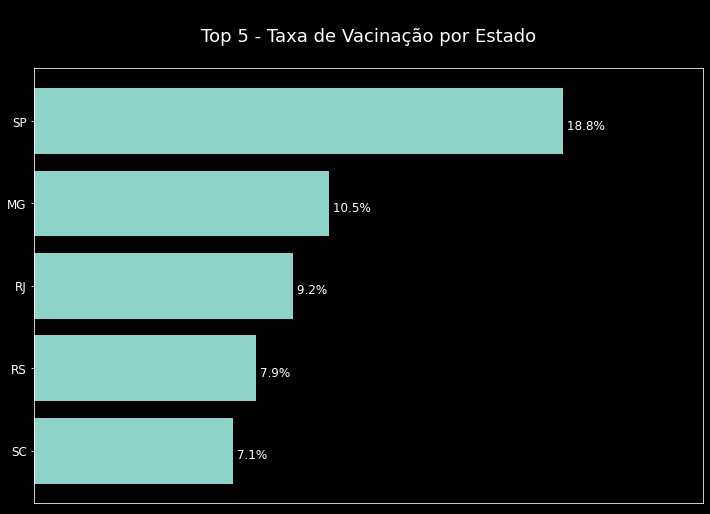

In [431]:
cria_plot(uf.uf, uf.pct)

plt.title('\nTop 5 - Taxa de Vacinação por Estado\n', fontsize=18)
plt.show()

A maioria dos vacinados deste conjunto de dados são do estado de _SP_.

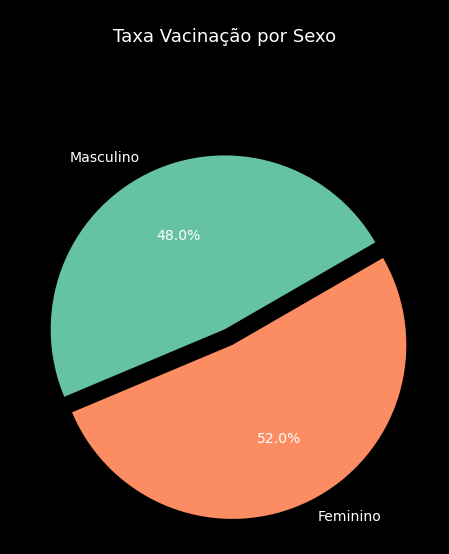

In [426]:
sexo = df.groupby('_source.paciente_enumSexoBiologico').size().sort_values()
cs = cm.Set2(np.arange(2))

plt.figure(figsize=(8,8))
plt.pie(sexo,
        autopct='%1.1f%%',
        labels=['Masculino', 'Feminino'],
        textprops={'fontsize':14},
        explode=(0.0, 0.1),
        startangle=30,
        colors=cs)
plt.title('\nTaxa Vacinação por Sexo\n', fontsize=18, y=1.1)
plt.show()

Mulheres se vacinaram mais que os homens.

In [423]:
grupos = df.groupby('_source.vacina_categoria_nome').size().sort_values(ascending=False)
grupos = grupos.reset_index()
grupos.columns = ['grupo', 'count']
grupos['pct'] = round((grupos['count']/grupos['count'].sum())*100, 1)

outros = {
    'grupo': 'outros',
    'count': grupos[grupos['count'] < 100]['count'].sum(),
    'pct':   round(grupos[grupos['count'] < 100]['pct'].sum(), 1)
}

grupos = grupos[grupos['count'] > 100]
grupos = grupos.append(outros, ignore_index=True)
grupos = grupos.sort_values(by='pct')

grupos

,grupo,count,pct
4,Trabalhadores da Educação,203,2.0
3,Comorbidades,276,2.8
2,Trabalhadores Industriais,334,3.4
5,outros,430,4.5
1,Trabalhadores de Saúde,777,7.8
0,Faixa Etária,7948,79.7


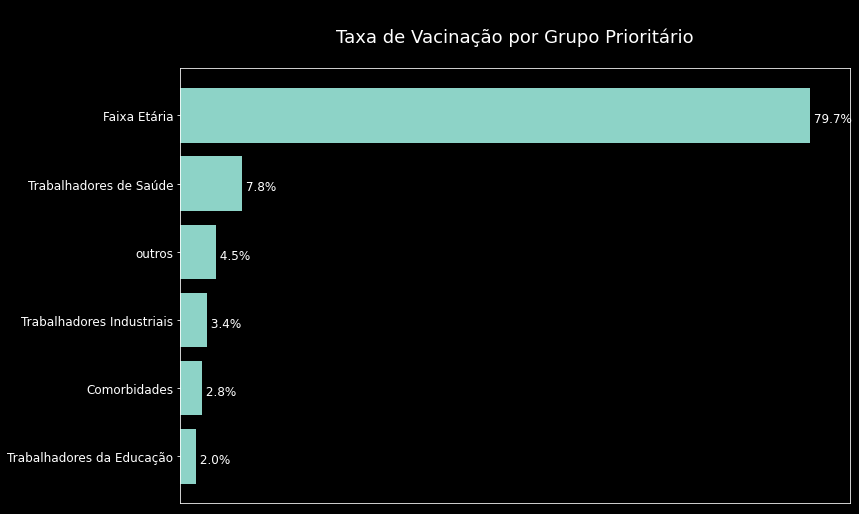

In [427]:
cria_plot(grupos.grupo, grupos.pct)
plt.title('\nTaxa de Vacinação por Grupo Prioritário\n', fontsize=18)
plt.show()

Vacinados pelo critério de prioridade por faixa etária foram os que mais se vacinaram.

In [344]:
vacinas = df.groupby('_source.vacina_nome').size()
vacinas = vacinas.reset_index()
vacinas.columns = ['vacina', 'count']
vacinas['pct'] = round((vacinas['count']/vacinas['count'].sum())*100,1)

vacinas['vacina'] = ['ASTRAZENECA', 'ASTRAZENECA/FIOCRUZ', 'JANSSEN', 'PFIZER', 'CORONAVAC']
vacinas = vacinas.sort_values(by='pct')
vacinas

,vacina,count,pct
0,ASTRAZENECA,124,1.2
2,JANSSEN,1147,11.5
4,CORONAVAC,1208,12.1
3,PFIZER,3214,32.1
1,ASTRAZENECA/FIOCRUZ,4307,43.1


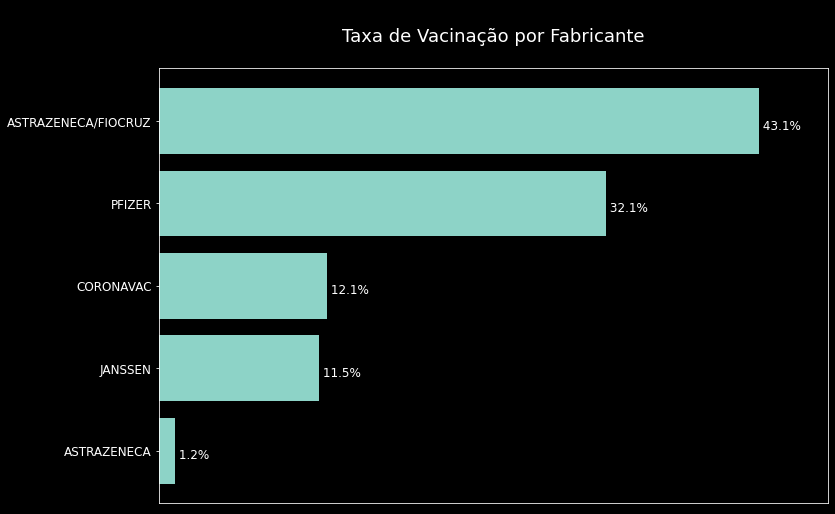

In [425]:
cria_plot(vacinas.vacina, vacinas.pct)

plt.title('\nTaxa de Vacinação por Fabricante\n', fontsize=18)
plt.show()

As vacinas do consórcio ASTRAZENECA/FIOCRUZ foram as mais aplicadas.